In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import minmax_scale
from sklearn import metrics

In [6]:
df = pd.read_csv('feature.csv')
df.head()

,red,green,blue,class
0,137.601168,164.151861,76.379085,0
1,87.610809,135.854727,41.928933,0
2,66.430575,154.891591,40.473052,0
3,79.411056,121.858225,51.353796,0
4,147.551549,173.542708,99.561643,0


In [7]:
X = df.loc[:, df.columns != 'class']
y = df['class']

In [10]:
np.array([1,2,3]) == 1

array([ True, False, False])

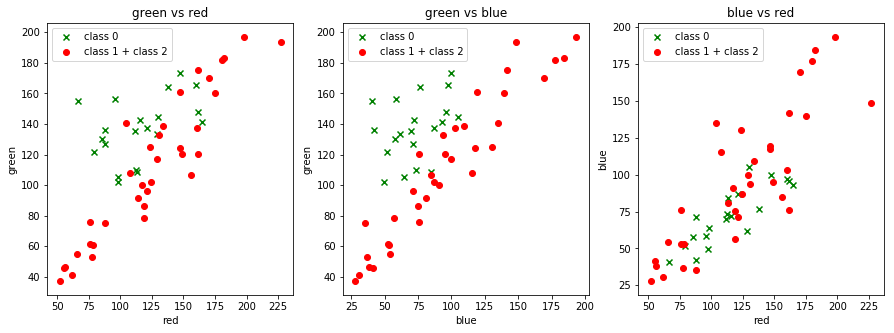

In [14]:
# Set figure size (width, height)
fig, axes = plt.subplots(1, 3,figsize=(15, 5))

def plot_vs(df, feature1, feature2, i):
    interest, others = df[df['class'] == 0], df[df['class'] != 0]
    axes[i].scatter(interest[f'{feature1}'], interest[f'{feature2}'], c='g', marker ='x', label='class 0')
    axes[i].scatter(others[f'{feature1}'], others[f'{feature2}'], c='r', marker ='o', label='class 1 + class 2')
    axes[i].set_xlabel(f'{feature1}')
    axes[i].set_ylabel(f'{feature2}')
    axes[i].legend()
    axes[i].set_title(f'{feature2} vs {feature1}')

plot_vs(df, 'red', 'green', 0)
plot_vs(df, 'blue', 'green', 1)
plot_vs(df, 'red', 'blue', 2)

In [21]:
X = minmax_scale(X)

In [188]:
class logmodel:
    def __init__(self, step_size=20, n_iter=3000):
        self.step_size = step_size
        self.n_iter = n_iter
        self.loss_list = []
        self.weights = []
        
    def __sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def __gradient(self, X,y,w):
        N, d = X.shape
        grad=np.zeros((1,d))
        for i in range(N):
            grad=grad+(self.__sigmoid(np.dot(X[i,:],np.transpose(w)))-y[i])*X[i,:]
        grad=np.dot(1/N,grad)
        return grad
    
    def logisticRegression_func(self,X,y):
        """
        K: no. of iteration
        """
        N, d = X.shape
        # Initialize w as 1xd array.
        w = np.zeros((1,d))
        loss = float('inf')
        loss_list = []
        for i in range(self.n_iter):
            grad=self.__gradient(X,y,w)
            w = w-self.step_size * grad
            l = self.__sigmoid(np.dot(X,np.transpose(w)))
            loss = -np.dot(np.squeeze(np.asarray(y)),np.log(l))-np.dot(1-np.squeeze(np.asarray(y)),np.log(1-l))
            loss_list.append(loss/N)
        self.loss_list.append(loss_list)
        
        return w
    
    def fit(self,X,y):
        self.label_names = np.unique(y)
        for k in np.unique(y):
            y_prime = np.array([1 if label == k else 0 for label in y])
            w = self.logisticRegression_func(X,y_prime)
            self.weights.append(w)
            
    def predict(self, X, show_prob=False):
        k = len(np.unique(self.label_names)) # no. of classes
        N, d = X.shape # 55, 3
        
        y_predict = np.zeros((N,k))
        for i, w in enumerate(self.weights):
            y_predict[:, i] = self.__sigmoid(np.dot(X,np.transpose(w))).flatten()
        
        if show_prob:
            return y_predict
        else:
            return np.apply_along_axis(np.argmax, 1, y_predict)

In [197]:
lm = logmodel()
lm.fit(X,y)
weights = lm.weights
weights

[array([[-13.84805274,  31.45188231, -30.87106413]]),
 array([[ 16.66479488, -21.56013425,   6.07162006]]),
 array([[-2.94361947, -7.2939109 , 11.79381593]])]

In [198]:
y_predict = lm.predict(X)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1,
       2, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2])

In [199]:
acc = np.mean(y_predict == y)
error = 1 - acc
error, acc

(0.2545454545454545, 0.7454545454545455)

In [200]:
print(metrics.classification_report(y_pred=y_predict, y_true=y))

             precision    recall  f1-score   support

          0       0.83      0.95      0.88        20
          1       0.85      0.55      0.67        20
          2       0.58      0.73      0.65        15

avg / total       0.77      0.75      0.74        55

